In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = '/home/senthilpalanisamy/work/courses/495_geospatial_vision/sample_drive/small_data'
data_folders = os.listdir(data_path)

In [3]:
results = []
sample_images = []


for image_folder in data_folders:
    
    image_sequence_path = os.path.join(data_path, image_folder)
    image_names = os.listdir(image_sequence_path)
    image_paths = [os.path.join(image_sequence_path, name) for name in image_names]

    sample_image = cv2.imread(image_paths[0], 0)
    h, w = sample_image.shape
    max_gradient = np.zeros((h, w))
    all_frames = []
    max_dim = max(sample_image.shape)
    prev_gray = sample_image
    
    mask = np.zeros((prev_gray.shape[0], prev_gray.shape[1], 3))
    mask[..., 1] = 255
    average_flow = np.zeros((prev_gray.shape[0], prev_gray.shape[1]))
    
    sample_images = []
    color_image = cv2.imread(image_paths[0])

    sample_images.append(color_image)

    for index, path in enumerate(sorted(image_paths)):
           # Read a frame from video
    
        frame = cv2.imread(path)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        rgb = cv2.cvtColor(mask.astype(np.uint8), cv2.COLOR_HSV2BGR)
    
    
        dense_flow = cv2.addWeighted(frame, 1,rgb, 2, 0)
        average_flow += magnitude
        prev_gray = gray
        
    
        
    average_flow = average_flow / len(image_paths)
    #print('here')
    results.append(average_flow)

   

In [4]:
print(len(results))
print(len(data_folders))

5
5


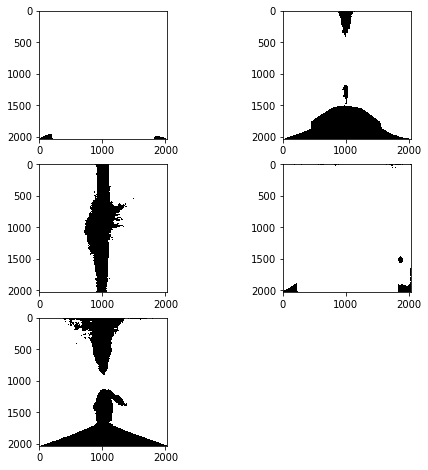

In [19]:
fig=plt.figure(figsize=(8, 8))
flow_threshold = 10
flow_threshold2 = 25
mask_images = []
rows = 3
cols = 2
for i, average_flow in enumerate(results):
    mask_image = np.zeros((prev_gray.shape[0], prev_gray.shape[1]))
    mask_image[average_flow > flow_threshold] = 255
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(mask_image,cmap='Greys_r')
    mask_images.append(mask_image)

In [20]:
sample_images = []
for image_folder in data_folders:
    
    image_sequence_path = os.path.join(data_path, image_folder)
    image_names = os.listdir(image_sequence_path)
    image_paths = [os.path.join(image_sequence_path, name) for name in image_names]
    color_image = cv2.imread(image_paths[0])
    sample_images.append(color_image)

In [21]:
print(len(sample_images))

5


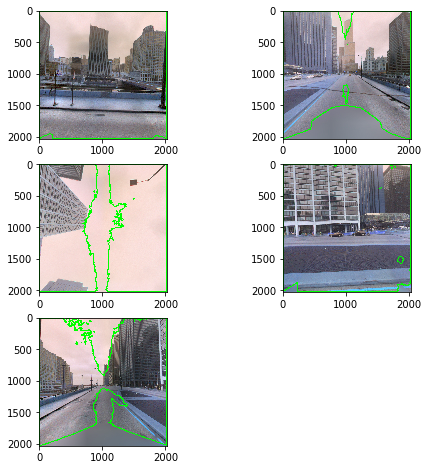

In [22]:
fig4=plt.figure(figsize=(8, 8))
image_results = []

for i, (image, color_image) in enumerate(zip(mask_images, sample_images)):
    contours, hierarchy = cv2.findContours(image.astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # print(contours)
    image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    #cv2.drawContours(image, contours, -1, (0, 255, 0), 15)
    cv2.drawContours(color_image, contours, -1, (0, 255, 0), 15)

    fig4.add_subplot(rows, cols, i+1)
    image_results.append(color_image)

    plt.imshow(color_image)